# Can you tell the difference?

[![GitHub License](https://img.shields.io/github/license/Dragon1573/PyChallenge-Tips?color=important&label=Licence&style=flat-square)](https://github.com/Dragon1573/PyChallenge-Tips/blob/master/LICENSE)
[![Jump to Level 18](https://img.shields.io/badge/Jump%20to-Level%2018-blue?style=flat-square)](http://www.pythonchallenge.com/pc/return/balloons.html)

<center><img src="../../resources/imgs/Quiz18-1.png" /></center>

&emsp;&emsp;这是由2张小图片拼接而成的组合图。先检查源代码，看看有没有什么提示。

In [1]:
from requests import get
import bs4
from re import search

In [2]:
response = get(
    'http://www.pythonchallenge.com/pc/return/balloons.html',
    headers={'Authorization': 'Basic aHVnZTpmaWxl'}
)
response = bs4.BeautifulSoup(response.text)
print(search(r'<!--(.*)-->', response.prettify()).group(1))

 it is more obvious that what you might think 


&emsp;&emsp;`比你想的更明显`，这两张图最明显的区别就是亮度差，试试<http://www.pythonchallenge.com/pc/return/bright.html>。

In [3]:
response = get(
    'http://www.pythonchallenge.com/pc/return/bright.html',
    headers={'Authorization': 'Basic aHVnZTpmaWxl'}
)
print(response.text.rstrip())

ness


&emsp;&emsp;`ness`是单词后缀，会不会是<http://www.pythonchallenge.com/pc/return/brightness.html>？

In [4]:
response = get(
    'http://www.pythonchallenge.com/pc/return/brightness.html',
    headers={'Authorization': 'Basic aHVnZTpmaWxl'}
)
response = bs4.BeautifulSoup(response.text, features='html.parser')
print(response.img.next.next.strip())

maybe consider deltas.gz


&emsp;&emsp;按照提示获取`deltas.gz`并解压。

In [5]:
import gzip
from io import BytesIO, StringIO
from difflib import Differ
from PIL import Image

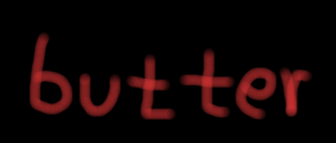

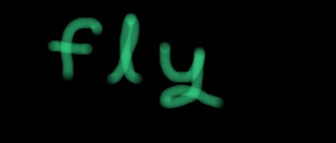

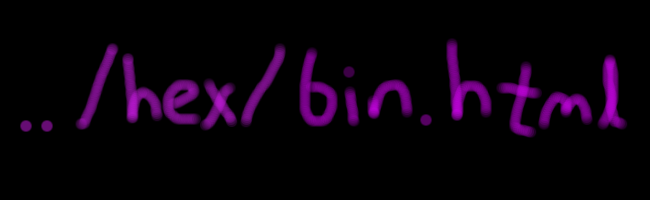

In [6]:
response = get(
    'http://www.pythonchallenge.com/pc/return/deltas.gz',
    headers={'Authorization': 'Basic aHVnZTpmaWxl'}
)
response = gzip.open(BytesIO(response.content))
response = response.read().decode()
content = ([], [])
for line in StringIO(response):
    parts = line.split('   ')
    content[0].append(parts[0].strip() + '\n')
    content[1].append(parts[-1].strip() + '\n')
compare = Differ().compare(content[0], content[1])
files = [bytes(), bytes(), bytes()]
for line in compare:
    byte_str = bytes([int(i, 16) for i in line[2:].strip().split(' ') if i])
    if line[0] == '+':
        files[0] += byte_str
    elif line[0] == '-':
        files[1] += byte_str
    else:
        files[2] += byte_str
display(Image.open(BytesIO(files[0])))
display(Image.open(BytesIO(files[1])))
display(Image.open(BytesIO(files[2])))

&emsp;&emsp;现在，我们获得了3张图片，这三张图片的意思是：

- 用户名：`butter`
- 密码：`fly`
- 下一关链接：<http://www.pythonchallenge.com/pc/hex/bin.html>